In [2]:
from models.AlexNetVAE import AlexNetVAE
model = AlexNetVAE(input_dim=(224,224,1), log_dir="egal", z_dims=[2000], kernel_visualization_layer=1, use_batch_norm=True, use_dropout=True, feature_map_layers=[3,7,11,14,17], inner_activation="LeakyReLU")
model.load_weights('/Users/leo/Downloads/alexnet_vae.h5')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [3]:
model2 = AlexNetVAE(input_dim=(224,224,1), log_dir="egal", z_dims=[2000], kernel_visualization_layer=1, use_batch_norm=True, use_dropout=True, feature_map_layers=[3,7,11,14,17], inner_activation="LeakyReLU", use_bias=False)
model2.load_weights('/Users/leo/Downloads/weights.h5')

0
Visualizing feature maps for layer 3
1/1 [==============================] - 0s 260ms/step
Visualizing feature maps for layer 7
1/1 [==============================] - 0s 368ms/step
Visualizing feature maps for layer 11
1/1 [==============================] - 0s 489ms/step
Visualizing feature maps for layer 14
1/1 [==============================] - 0s 333ms/step
Visualizing feature maps for layer 17
1/1 [==============================] - 0s 487ms/step
Visualizing feature maps for layer 18
1/1 [==============================] - 0s 411ms/step
1
Visualizing feature maps for layer 3
1/1 [==============================] - 0s 361ms/step
Visualizing feature maps for layer 7
1/1 [==============================] - 0s 414ms/step
Visualizing feature maps for layer 11
1/1 [==============================] - 0s 436ms/step
Visualizing feature maps for layer 14
1/1 [==============================] - 0s 487ms/step
Visualizing feature maps for layer 17
1/1 [==============================] - 1s 738ms/step

/Users/leo/IdeaProjects/Masterarbeit/Master Thesis/callbacks/FeatureMapVisualizationCallback.py:143: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axx.set_yticks(np.arange(len(self.batch_nrs), step=2), self.batch_nrs[0::2])
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

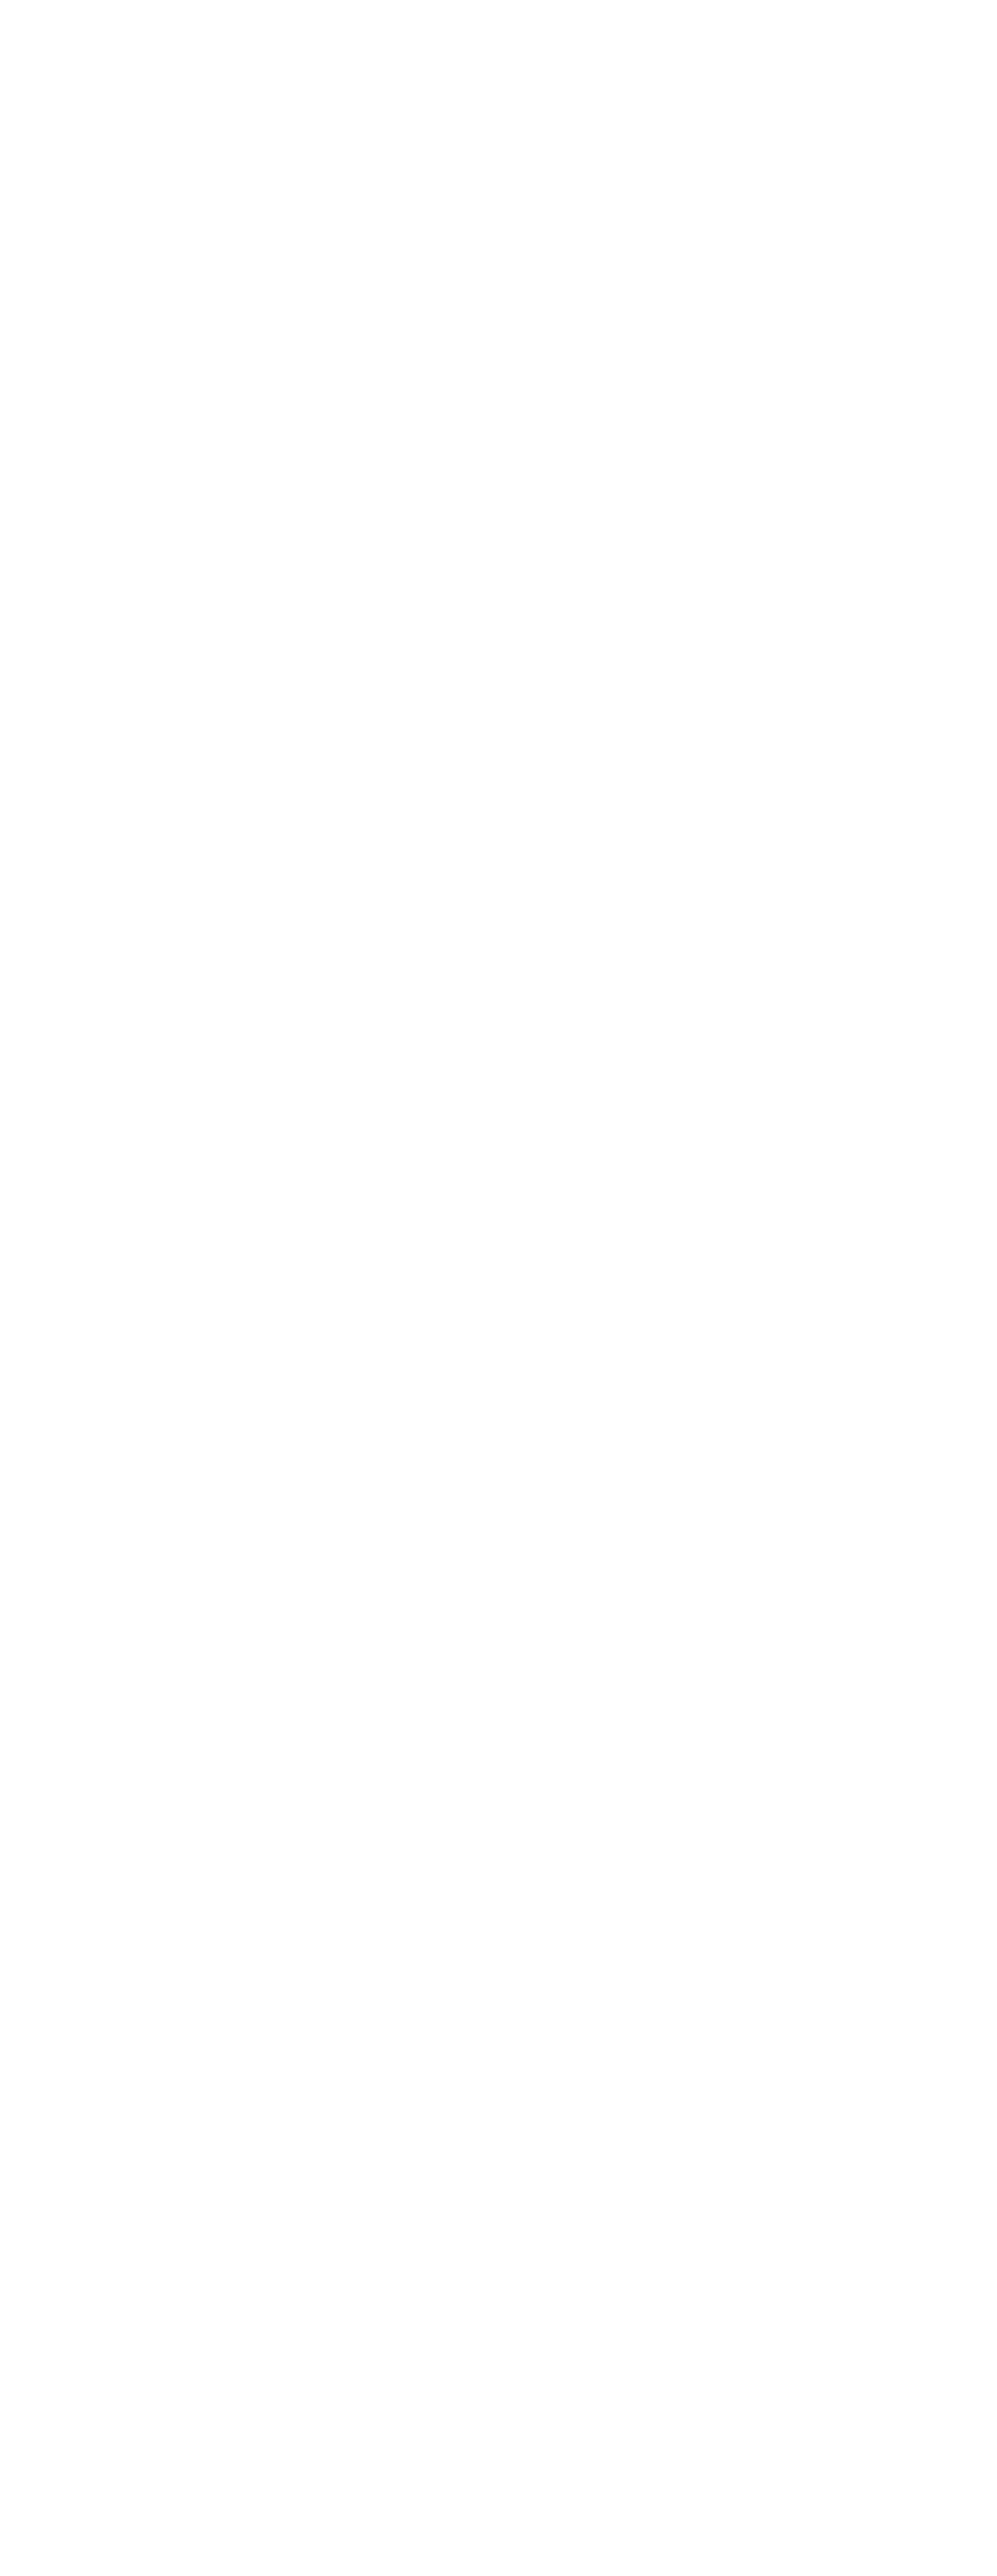

<Figure size 1440x5616 with 0 Axes>

<Figure size 1440x5616 with 0 Axes>

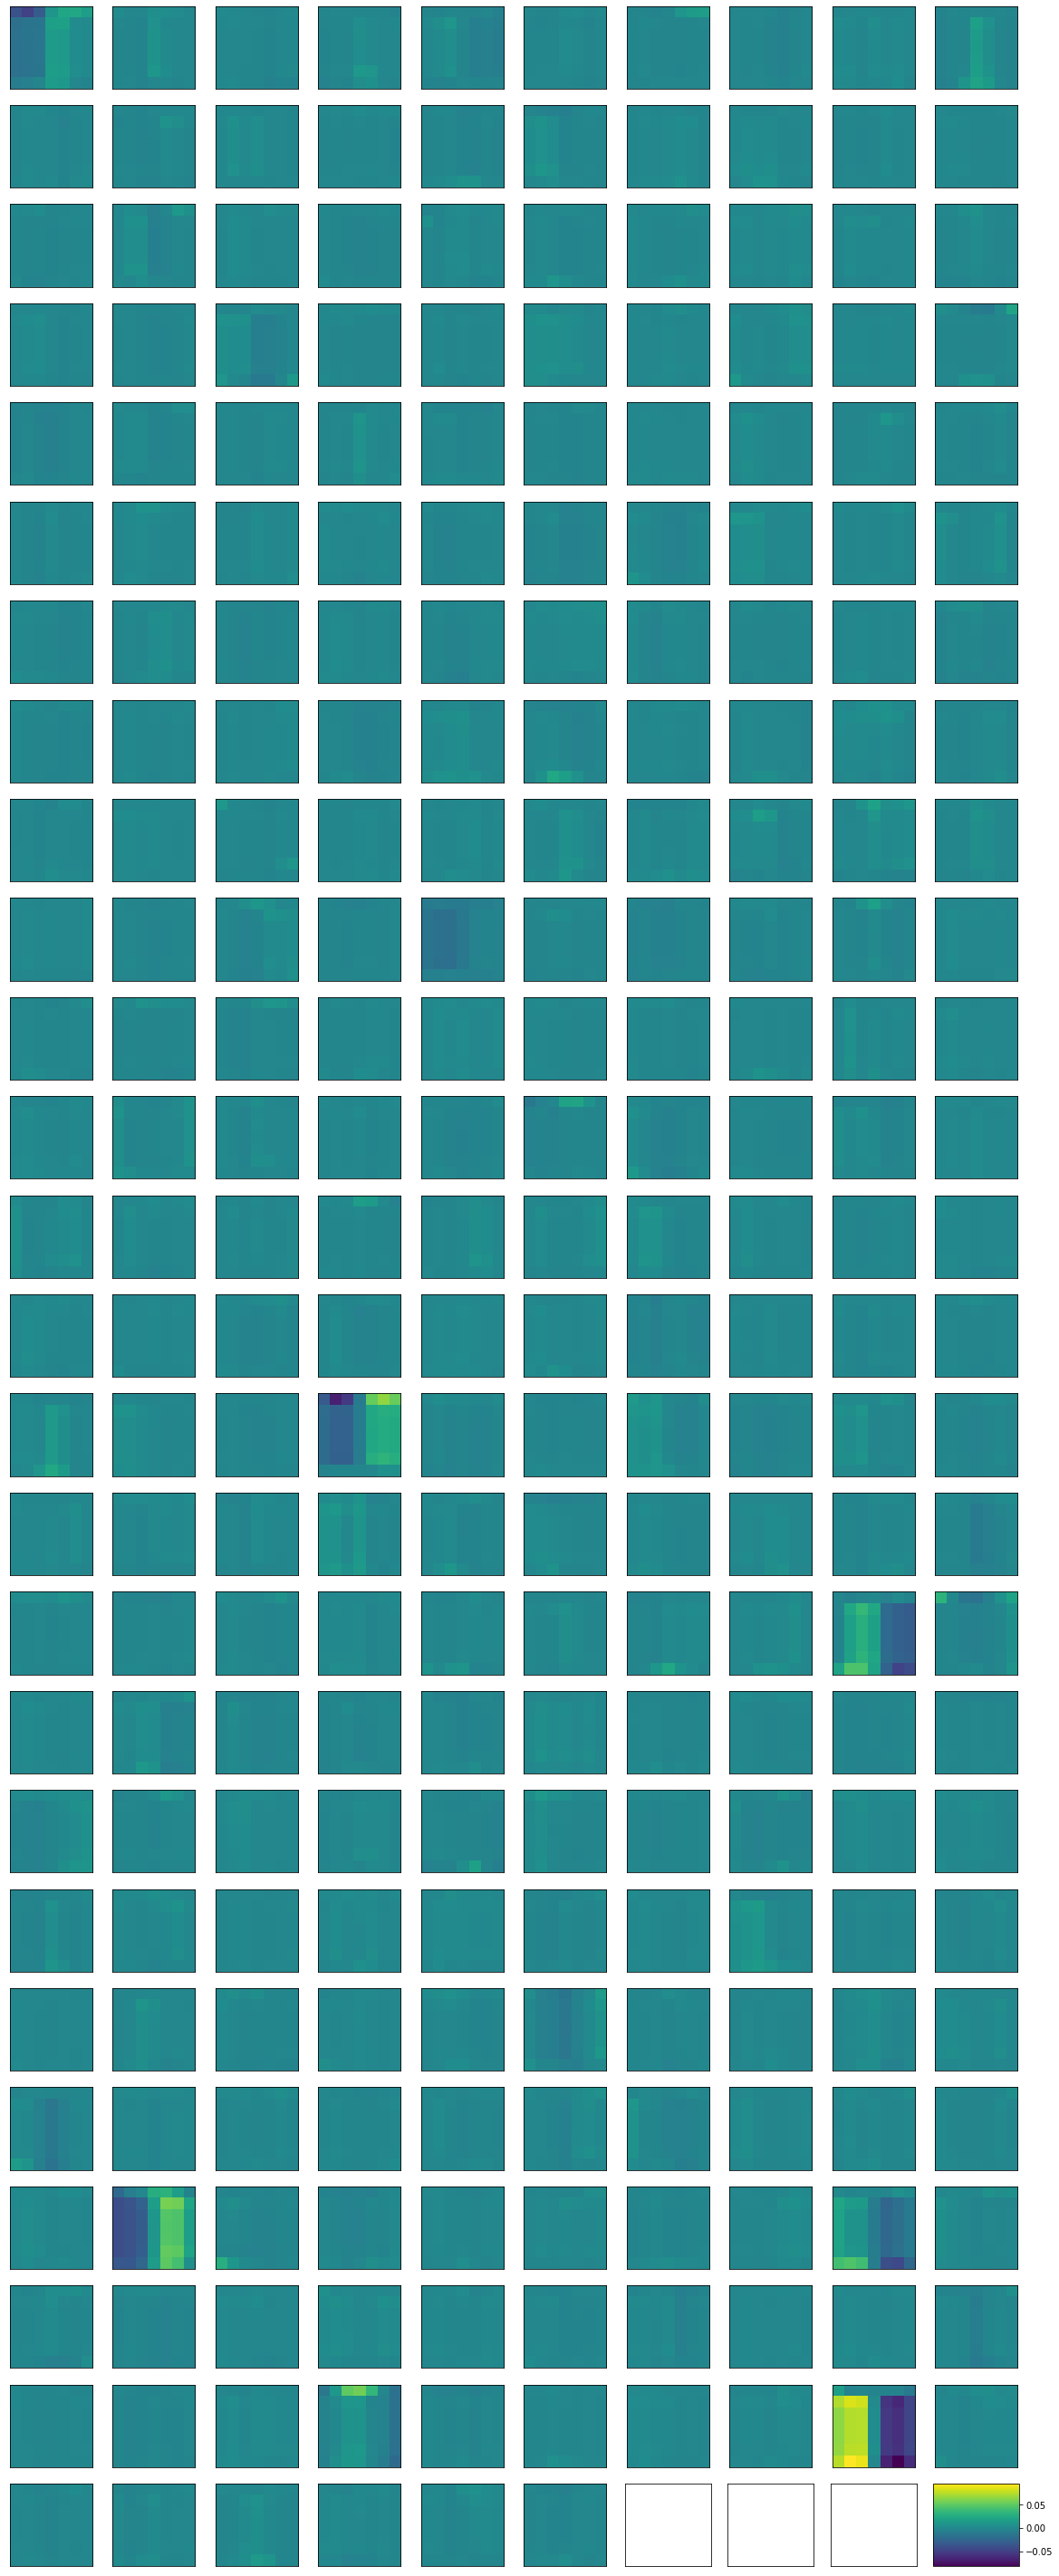

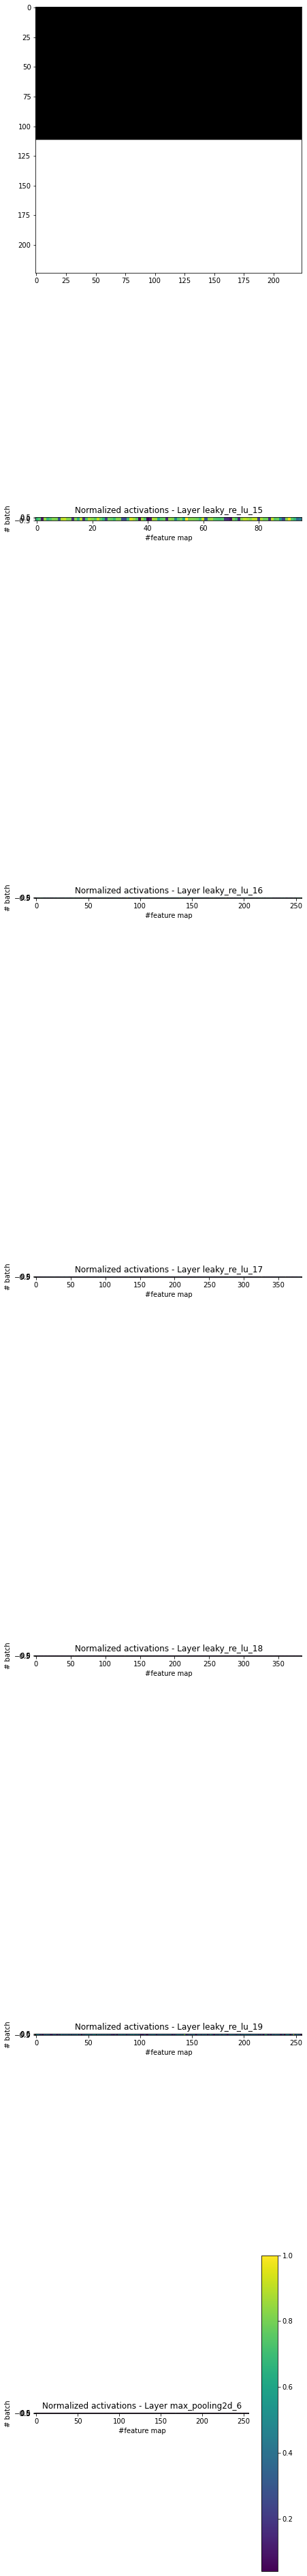

<Figure size 1440x1440 with 0 Axes>

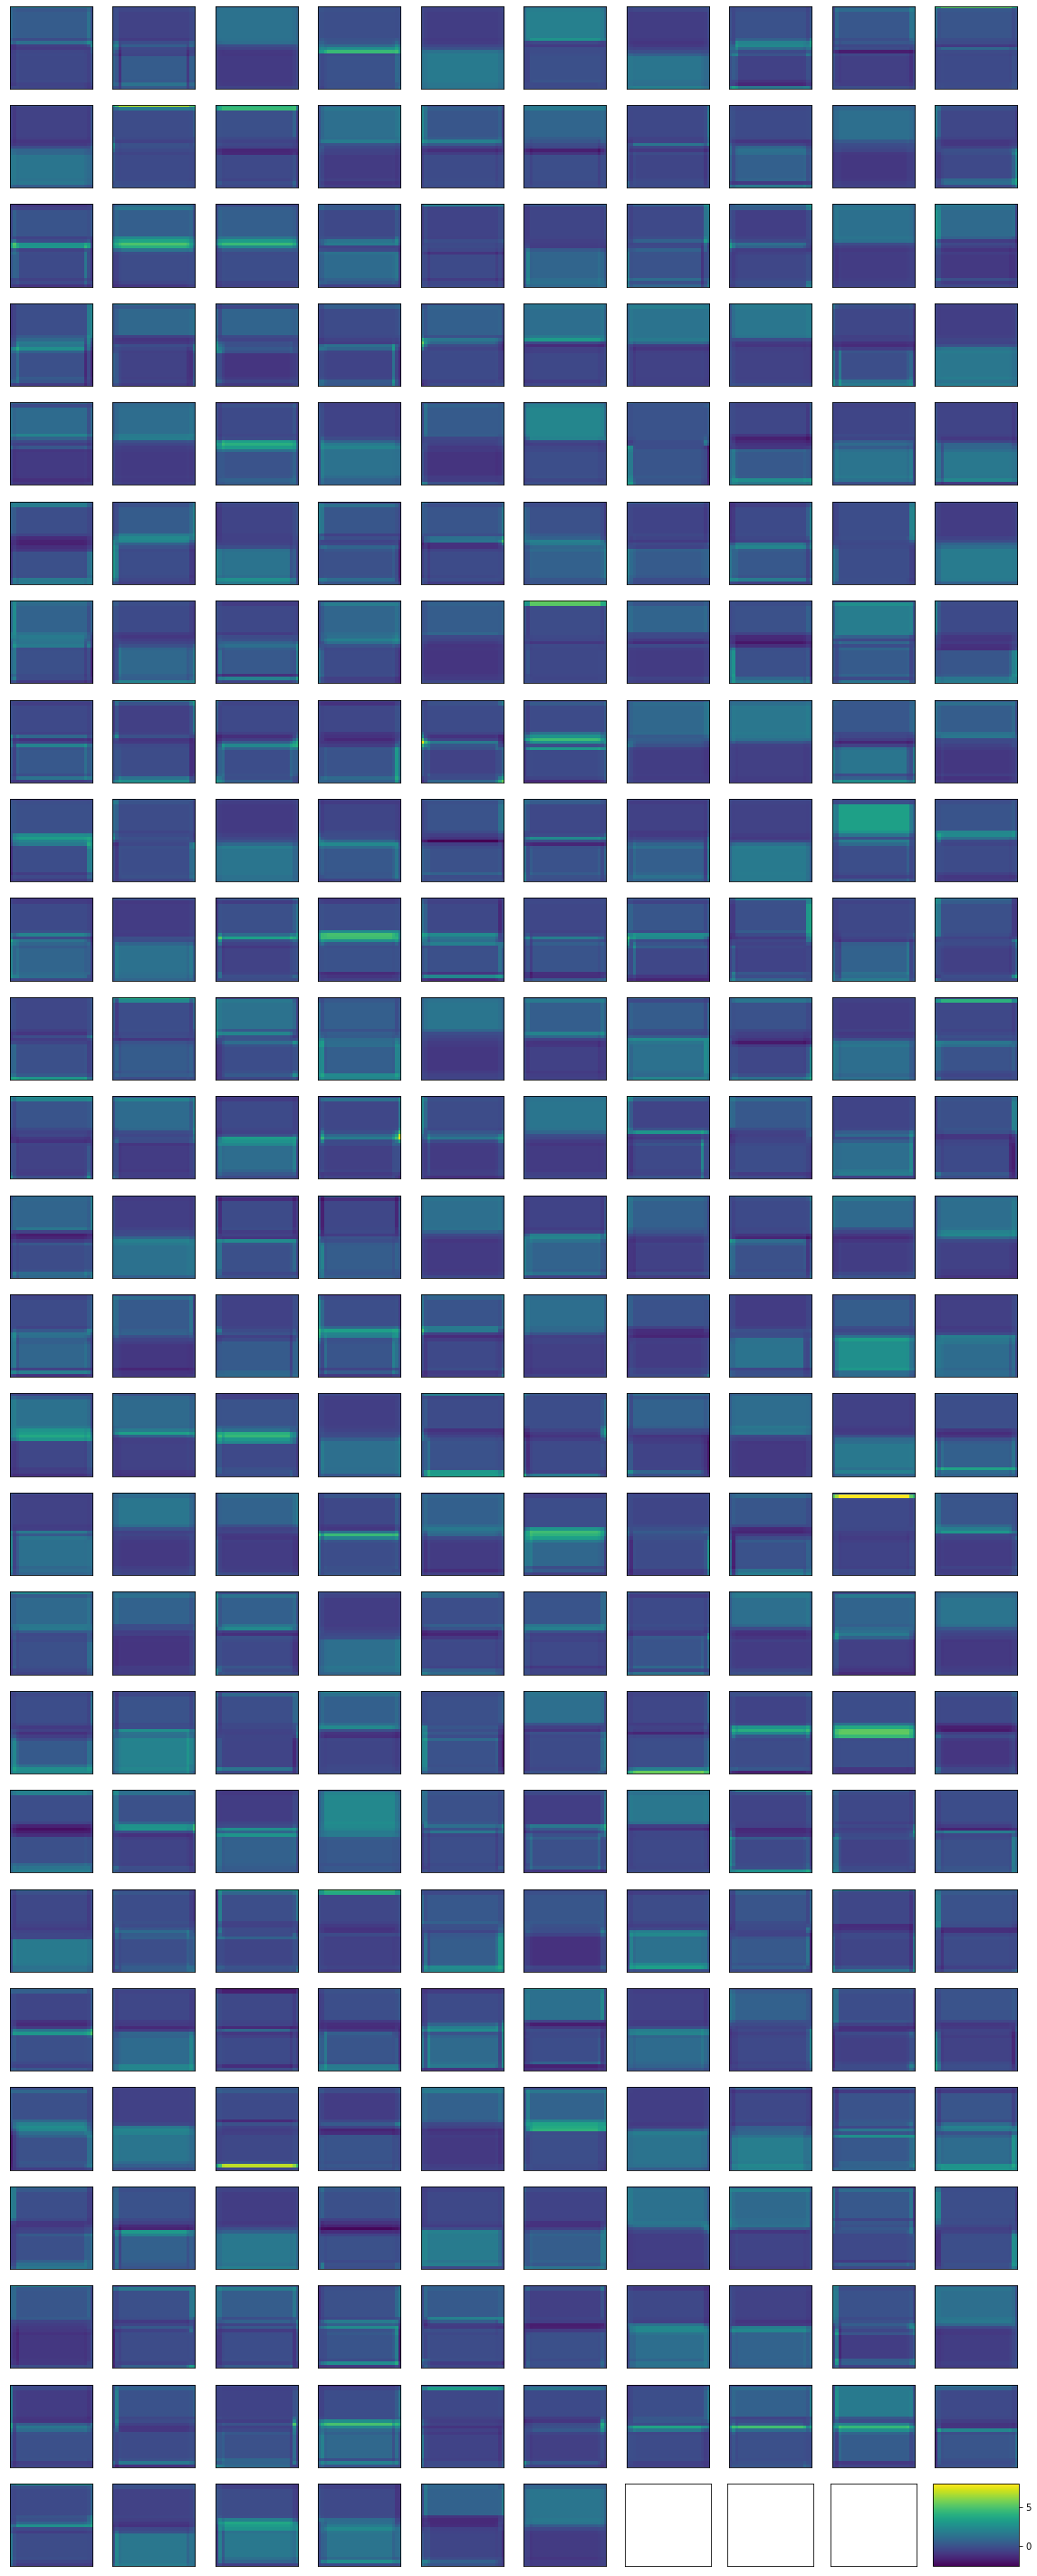

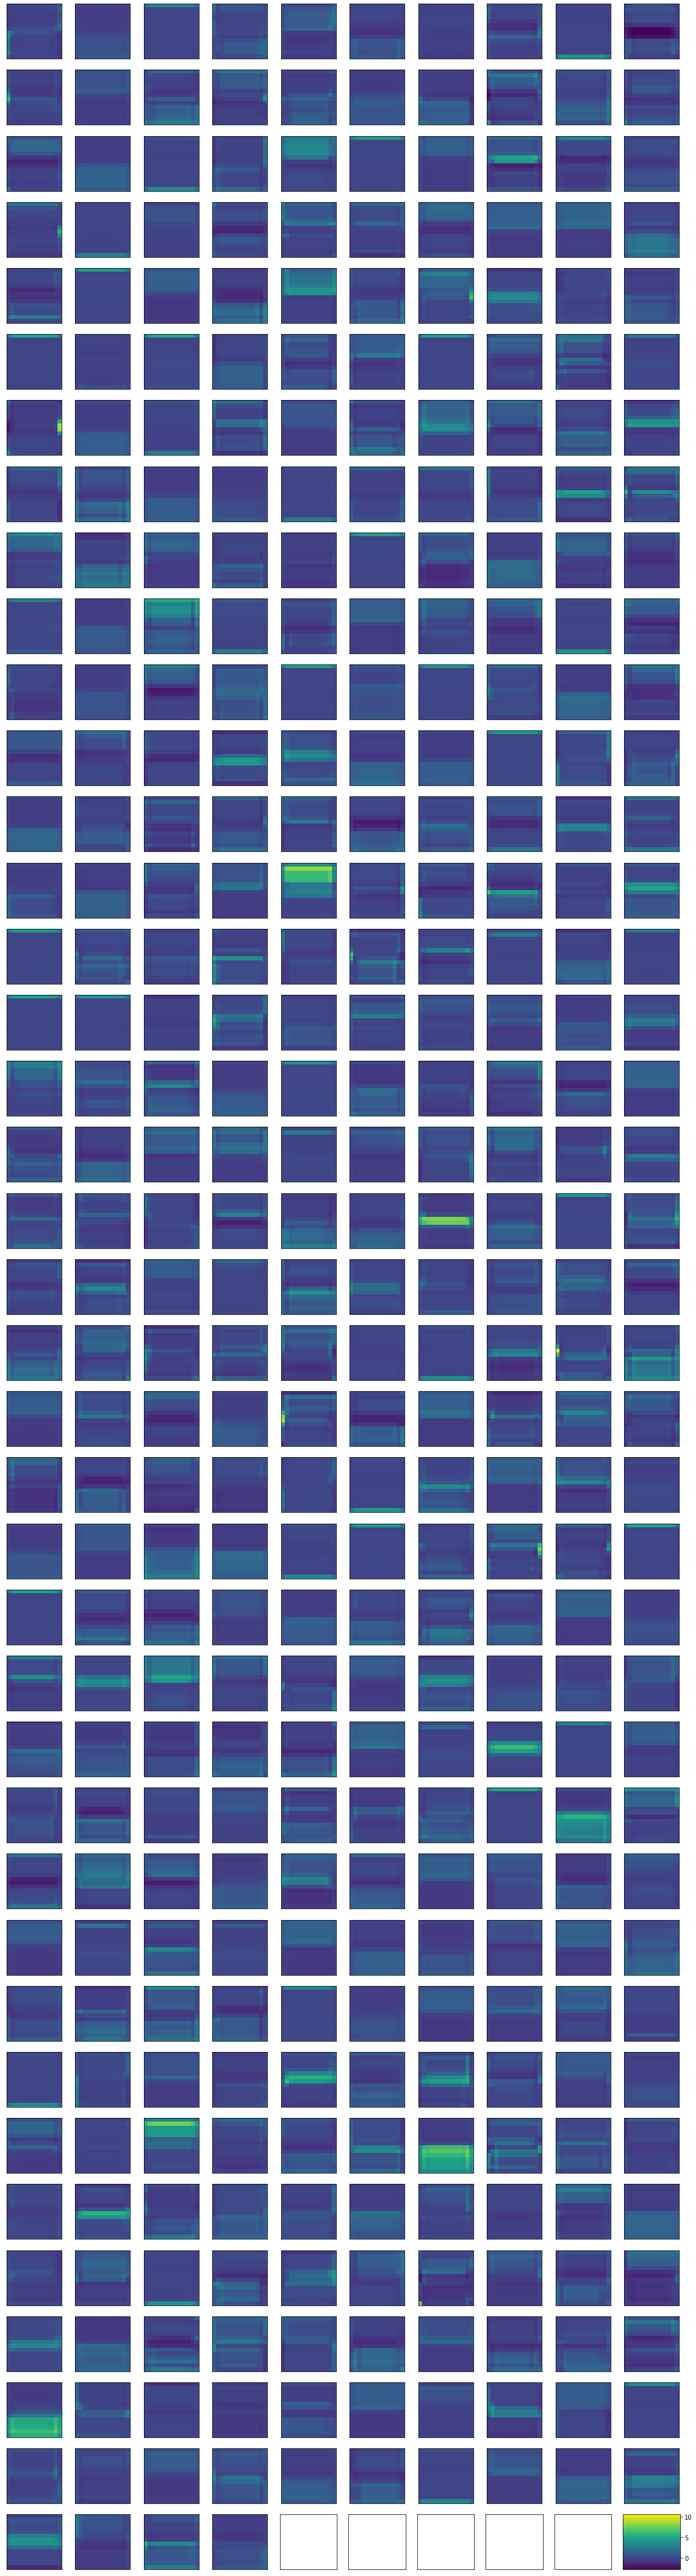

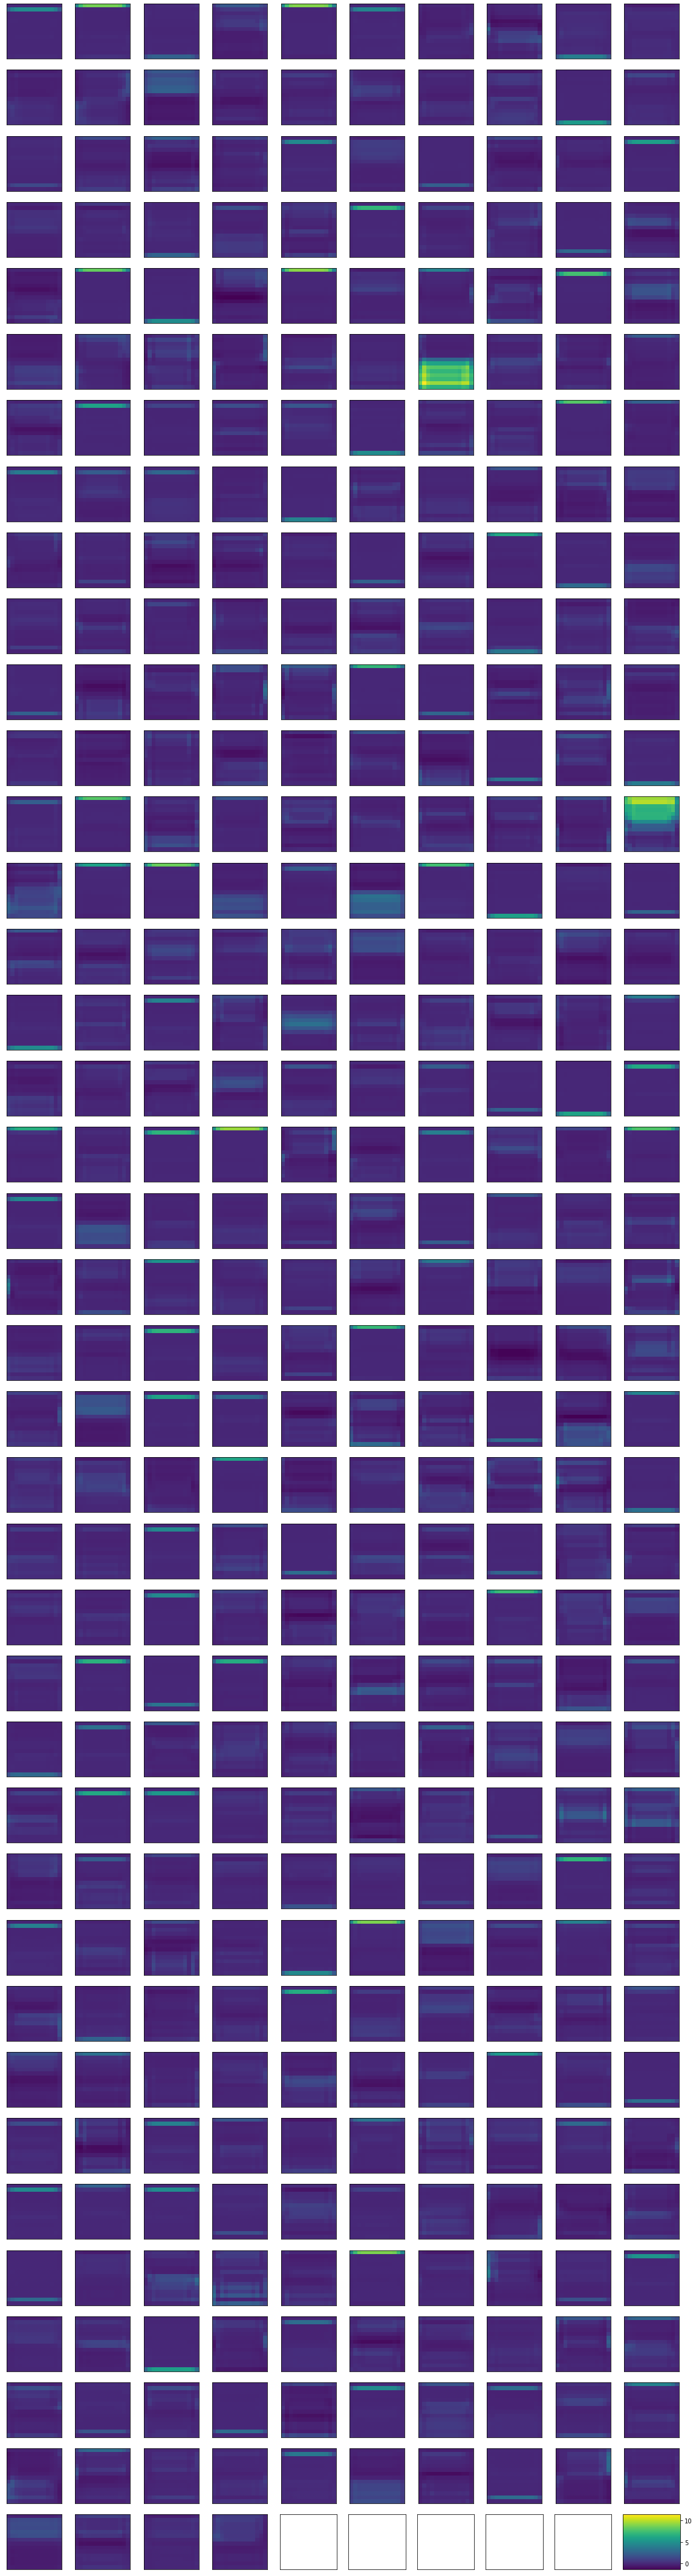

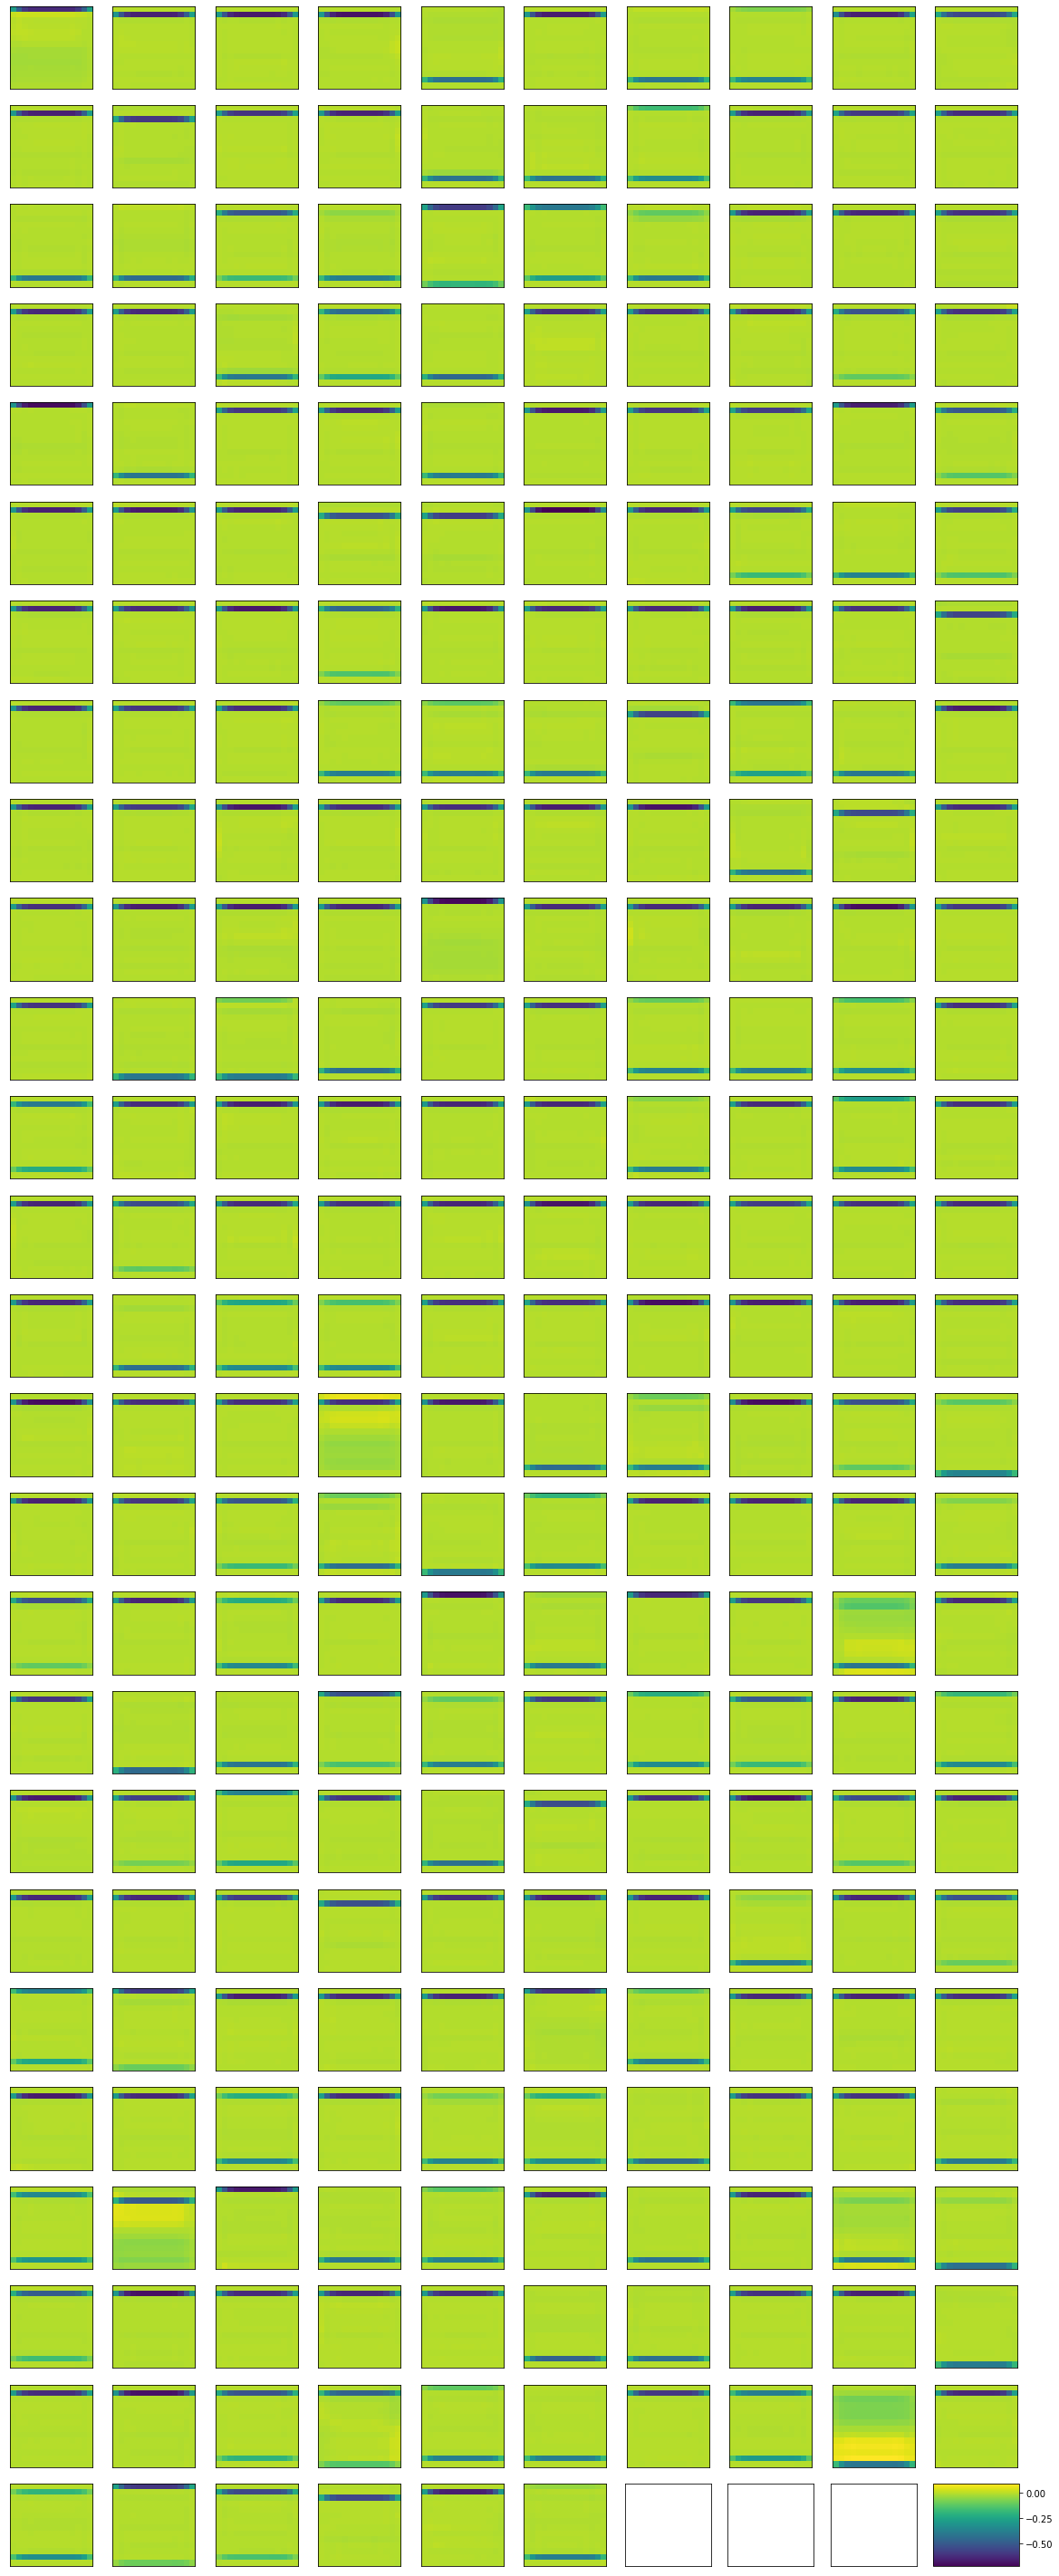

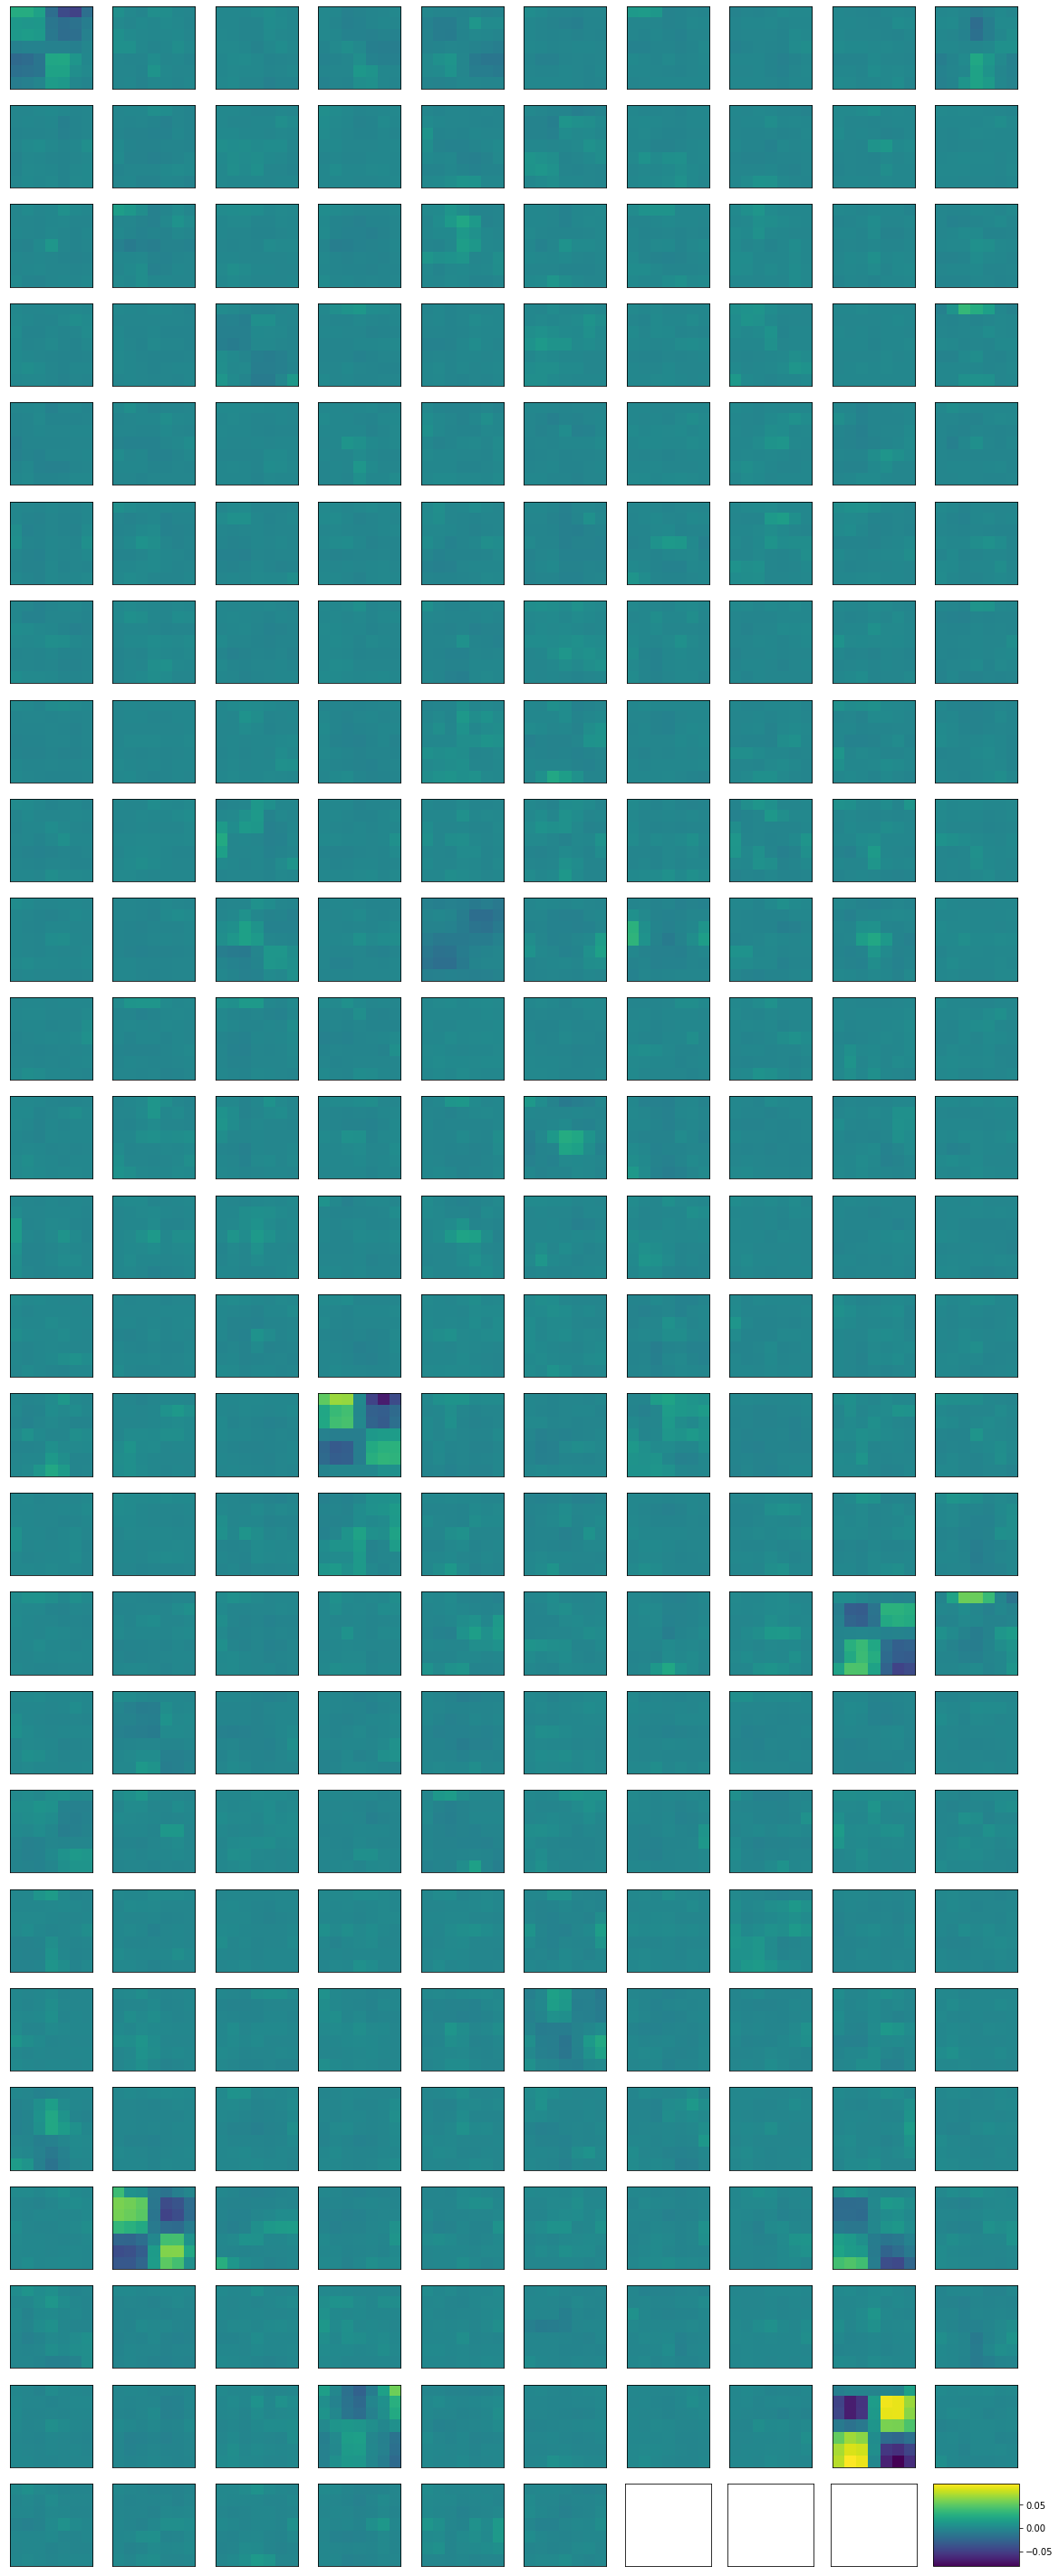

In [4]:
import numpy as np
from callbacks.FeatureMapVisualizationCallback import FeatureMapVisualizationCallback
x1 = np.zeros((224,224,1))
x2 = np.ones((224,224,1))
x3 = np.concatenate((np.ones((112,224,1)), np.zeros((112,224,1))), axis=0)
x6 = np.concatenate((np.zeros((112,224,1)), np.ones((112,224,1))), axis=0)
x4 = np.concatenate((np.ones((224,112,1)), np.zeros((224,112,1))), axis=1)
x7 = np.concatenate((np.zeros((224,112,1)), np.ones((224,112,1))), axis=1)
x5 = np.concatenate((np.concatenate((np.zeros((112, 112, 1)), np.ones((112, 112, 1))), axis=1),np.concatenate((np.ones((112, 112, 1)), np.zeros((112, 112, 1))), axis=1)), axis=0)
x8 = np.concatenate((np.concatenate((np.ones((112, 112, 1)), np.zeros((112, 112, 1))), axis=1),np.concatenate((np.zeros((112, 112, 1)), np.ones((112, 112, 1))), axis=1)), axis=0)
x9 = np.zeros((224,224,1))
x10 = np.zeros((224,224,1))
x11 = np.zeros((224,224,1))
x12 = np.zeros((224,224,1))
for i in range(8):
    if i % 2 == 0:
        x9[i*28:(i+1)*28, :, 0] = 1.0
        x10[:, i*28:(i+1)*28, 0] = 1.0
    for j in range(8):
        if (i+j) % 2 == 0:
            x11[i*28:(i+1)*28, j*28:(j+1)*28, 0]=1.0
        if i % 2 == 0 and j % 2 == 0:
            x12[i*28:(i+1)*28, j*28:(j+1)*28, 0]=1.0
#k = model.encoder.predict(np.zeros((1,228,228,1)))
for i, y in enumerate([x11, x12, x9, x10, x1, x2, x3, x4, x5, x6, x7, x8]):
    print(i)
    cb1 = FeatureMapVisualizationCallback(log_dir="abc{}".format(i), model_wrapper=model, print_every_n_batches=1, layer_idxs=[3,7,11,14,17,18], x_train = np.stack((y,y)),num_samples=1)
    cb2 = FeatureMapVisualizationCallback(log_dir="xyz{}".format(i), model_wrapper=model2, print_every_n_batches=1, layer_idxs=[3,7,11,14,17,18], x_train = np.stack((y,y)),num_samples=1)
    #cb1.on_batch_end(1)
    cb2.on_batch_end(1)


In [ ]:
model.encoder.summary()